<a href="https://colab.research.google.com/github/Nivedhasriram/Machine-Learning-and-Algorithms/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.image as mping
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

1. Understanding PCA on Iris dataset


In [10]:
df = pd.read_csv('iris.csv')
iris = load_iris()
df['species'] = iris.target

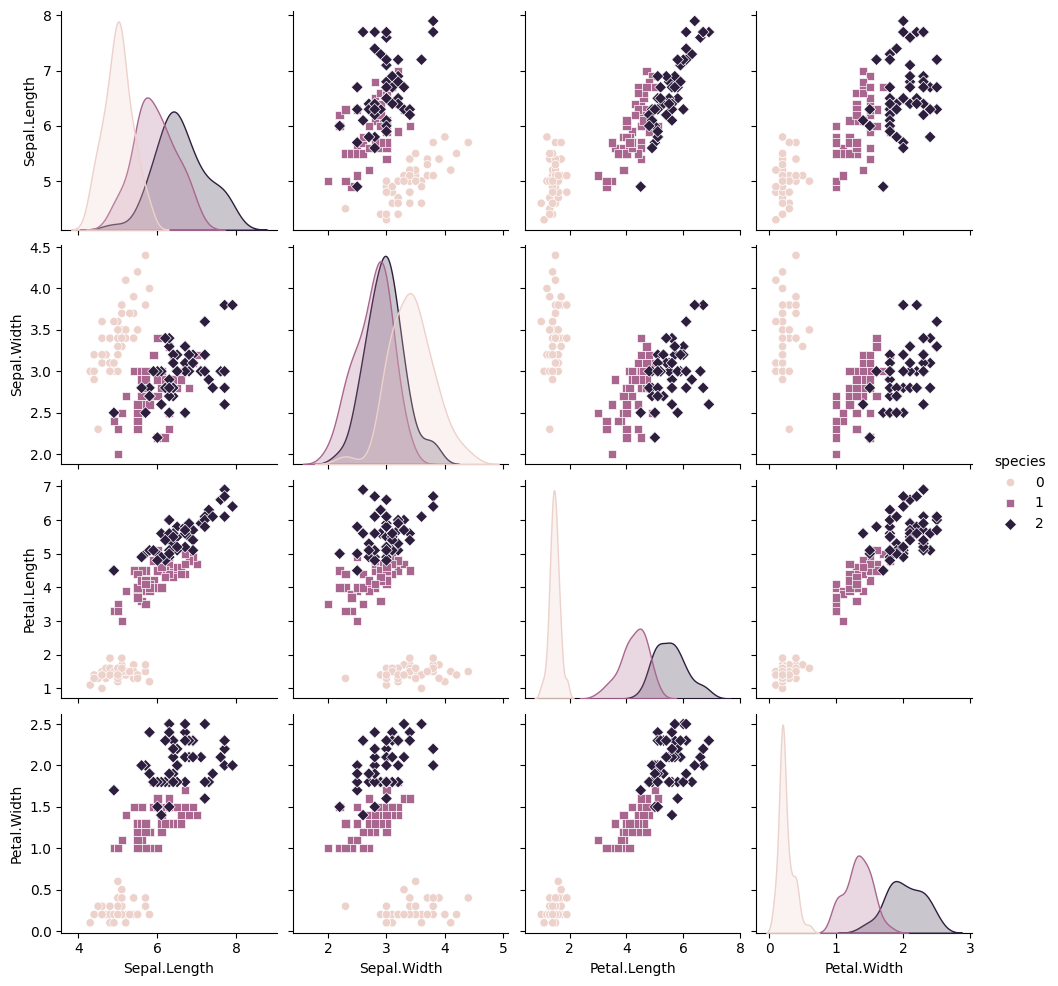

In [11]:
sns.pairplot(df, hue='species', markers=["o","s","D"])
plt.show()

In [13]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(iris.data)

In [15]:
covariance_matrix = np.cov(scaled_data.T)
print("Covarinace matrix:\n", covariance_matrix)

Covarinace matrix:
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [16]:
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
print("Eigen values:\n",eigenvalues)
print("Eigen vectors:\n", eigenvectors)

Eigen values:
 [0.02085386 0.14774182 0.9201649  2.93808505]
Eigen vectors:
 [[ 0.26128628  0.71956635  0.37741762 -0.52106591]
 [-0.12350962 -0.24438178  0.92329566  0.26934744]
 [-0.80144925 -0.14212637  0.02449161 -0.5804131 ]
 [ 0.52359713 -0.63427274  0.06694199 -0.56485654]]


In [17]:
sort = np.argsort(eigenvalues)[::-1]
sorted_eigen = eigenvectors[:,sort]

pca_data = np.dot(scaled_data, sorted_eigen[:, :2])

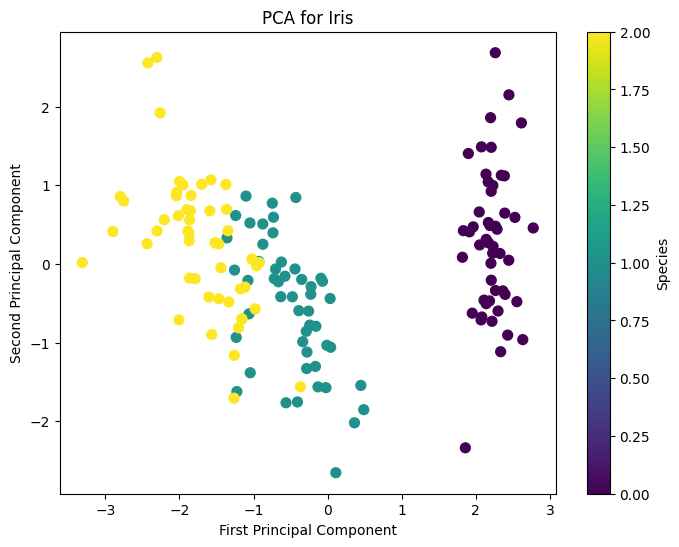

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], c=df['species'], cmap='viridis', s=50)
plt.title('PCA for Iris')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='Species')
plt.show()

2. PCA for Image Compression

In [25]:
img = mping.imread('/content/Grayscale2.jpg')

In [26]:
if len(img.shape) > 2:
  img = np.mean(img, axis=2)

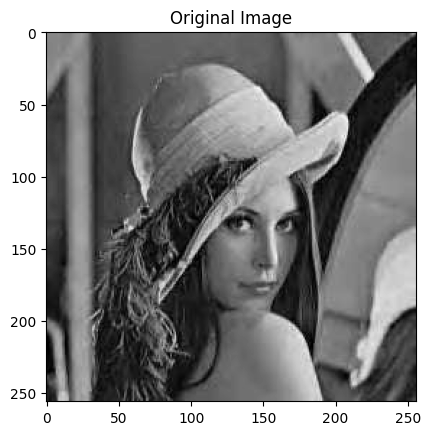

In [28]:
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.show()

In [29]:
img_2 = img.reshape(-1, img.shape[1])
print("Reshaped image shape:", img_2.shape)

Reshaped image shape: (256, 256)


In [31]:
def pca_compression(img_data, n_components):
  pca = PCA(n_components=n_components)
  transformed_data = pca.fit_transform(img_data)
  return pca, transformed_data

pca_50, transformd_50 = pca_compression(img_2, 50)

In [33]:
def reconstruction(pca, transformed_data):
  reconstructed_data = pca.inverse_transform(transformed_data)
  return reconstructed_data

reconstructed_50 = reconstruction(pca_50, transformd_50).reshape(img.shape)

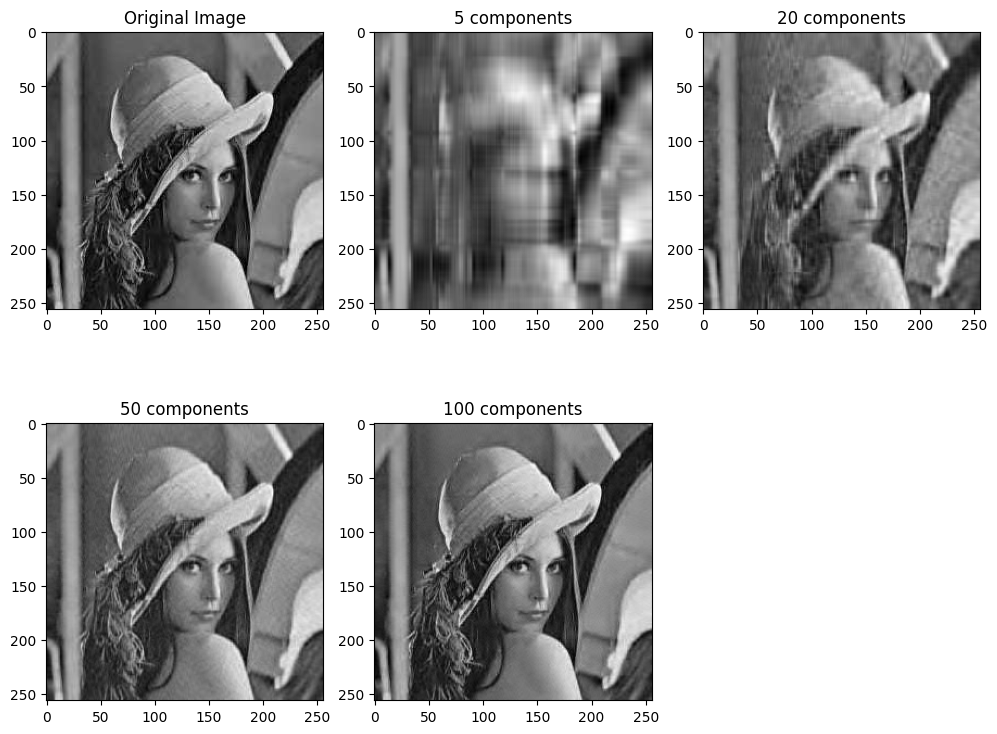

In [35]:
def plot_reconstruction(img, re_imgs, n_lists):
  plt.figure(figsize=(10, 8))
  plt.subplot(2,3,1)
  plt.imshow(img, cmap='gray')
  plt.title('Original Image')

  for i, (reconstructed, n_list) in enumerate(zip(re_imgs, n_lists)):
    plt.subplot(2, 3, i + 2)
    plt.imshow(reconstructed, cmap='gray')
    plt.title(f'{n_list} components')

  plt.tight_layout()
  plt.show()

n_lists = [5, 20, 50, 100]
re_imgs = [reconstruction(*pca_compression(img_2, n)) for n in n_lists]

plot_reconstruction(img, re_imgs, n_lists)

3. Feature Reduction in Classification Task

In [37]:
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [40]:
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=42)

In [42]:
reg = LogisticRegression(max_iter = 10000)
reg.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [43]:
y_pred = reg.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

In [44]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [47]:
def pca(x_train, x_test, n_components):
  pca = PCA(n_components=n_components)
  x_train_pca = pca.fit_transform(x_train)
  x_test_pca = pca.transform(x_test)
  return x_train_pca, x_test_pca, pca.explained_variance_ratio_

x_train_pca_5, x_test_pca_5, explained_variance_ratio_5 = pca(x_train, x_test, 5)

In [48]:
reg_pca_5 = LogisticRegression(max_iter = 10000)
reg_pca_5.fit(x_train_pca_5, y_train)

y_pred_pca_5 = reg_pca_5.predict(x_test_pca_5)
accuracy_pca_5 = accuracy_score(y_test, y_pred_pca_5)
precission_pca_5 = precision_score(y_test, y_pred_pca_5, average='weighted')
recall_pca_5 = recall_score(y_test, y_pred_pca_5, average='weighted')

print("PCA 5 Components Accuracy: ", accuracy_pca_5)
print("PCA 5 Components Precision: ", precission_pca_5)
print("PCA 5 Components Recall: ", recall_pca_5)

PCA 5 Components Accuracy:  1.0
PCA 5 Components Precision:  1.0
PCA 5 Components Recall:  1.0


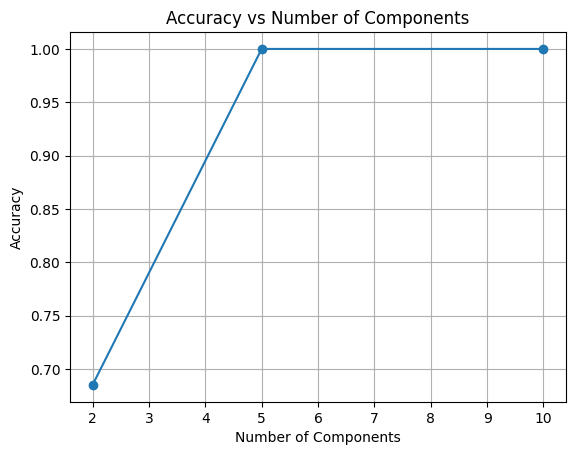

In [50]:
n_lists = [2, 5, 10]
accuracies = []

for n in n_lists:
  x_train_pca, x_test_pca, _ = pca(x_train, x_test, n)
  reg_pca = LogisticRegression(max_iter = 10000)
  reg_pca.fit(x_train_pca, y_train)
  y_pred_pca = reg_pca.predict(x_test_pca)
  accuracies.append(accuracy_score(y_test, y_pred_pca))

plt.plot(n_lists, accuracies, marker='o')
plt.title('Accuracy vs Number of Principle Components')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Components')
plt.grid(True)
plt.show()